# Feature selection

## Time related features

- Hour of the day
- Day of week
- Day of the year
- Month
- Season (Winter/Summer)
- Weekends/Holidays

## Weather features

- Temperature
- Cloud coverage
- Humidity
- Heating degrees

## Weather area coverage
- Number of cities to choose
- Share of population
- Geographical distribution

## Demand prediction
- Wind day-ahead generation
- Solar day-ahead generation

## Market forces

- Production costs
- Natural gas prices

## Correlation between Demand and price

In [82]:
%load_ext autoreload
%autoreload 2

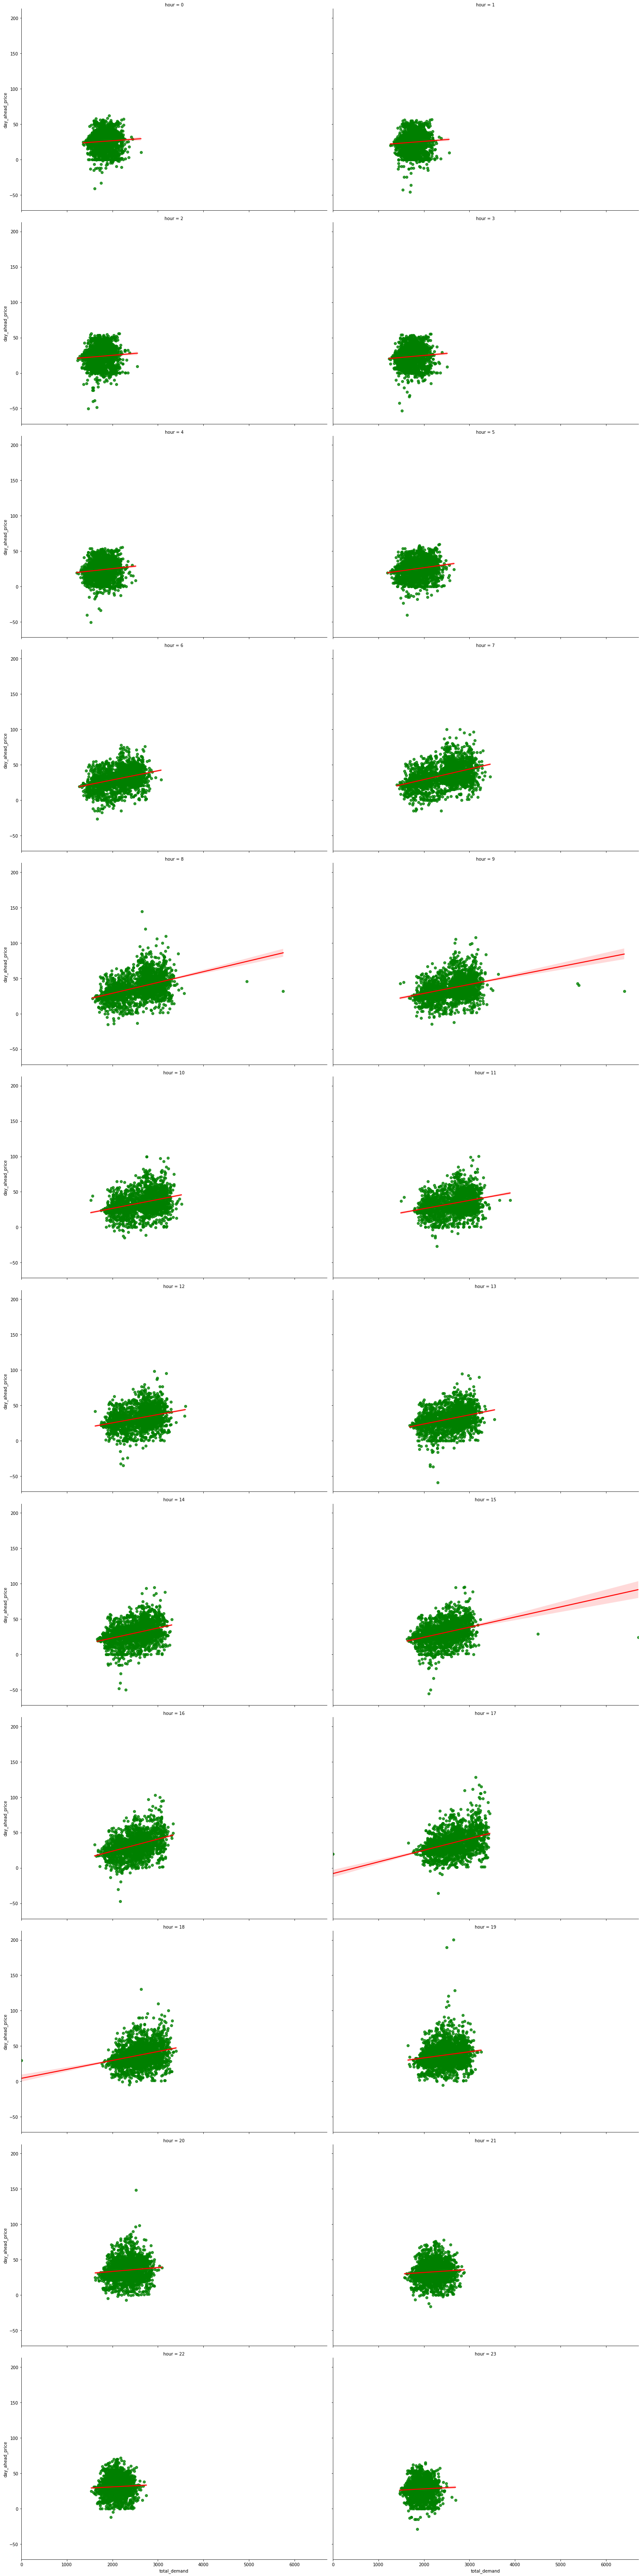

In [25]:
import seaborn as sns
g = sns.FacetGrid(loads, col="hour",col_wrap=2)
g.fig.set_size_inches(21,84)
g.map(sns.regplot, "total_demand","day_ahead_price",color="g",line_kws={"color": "red"});

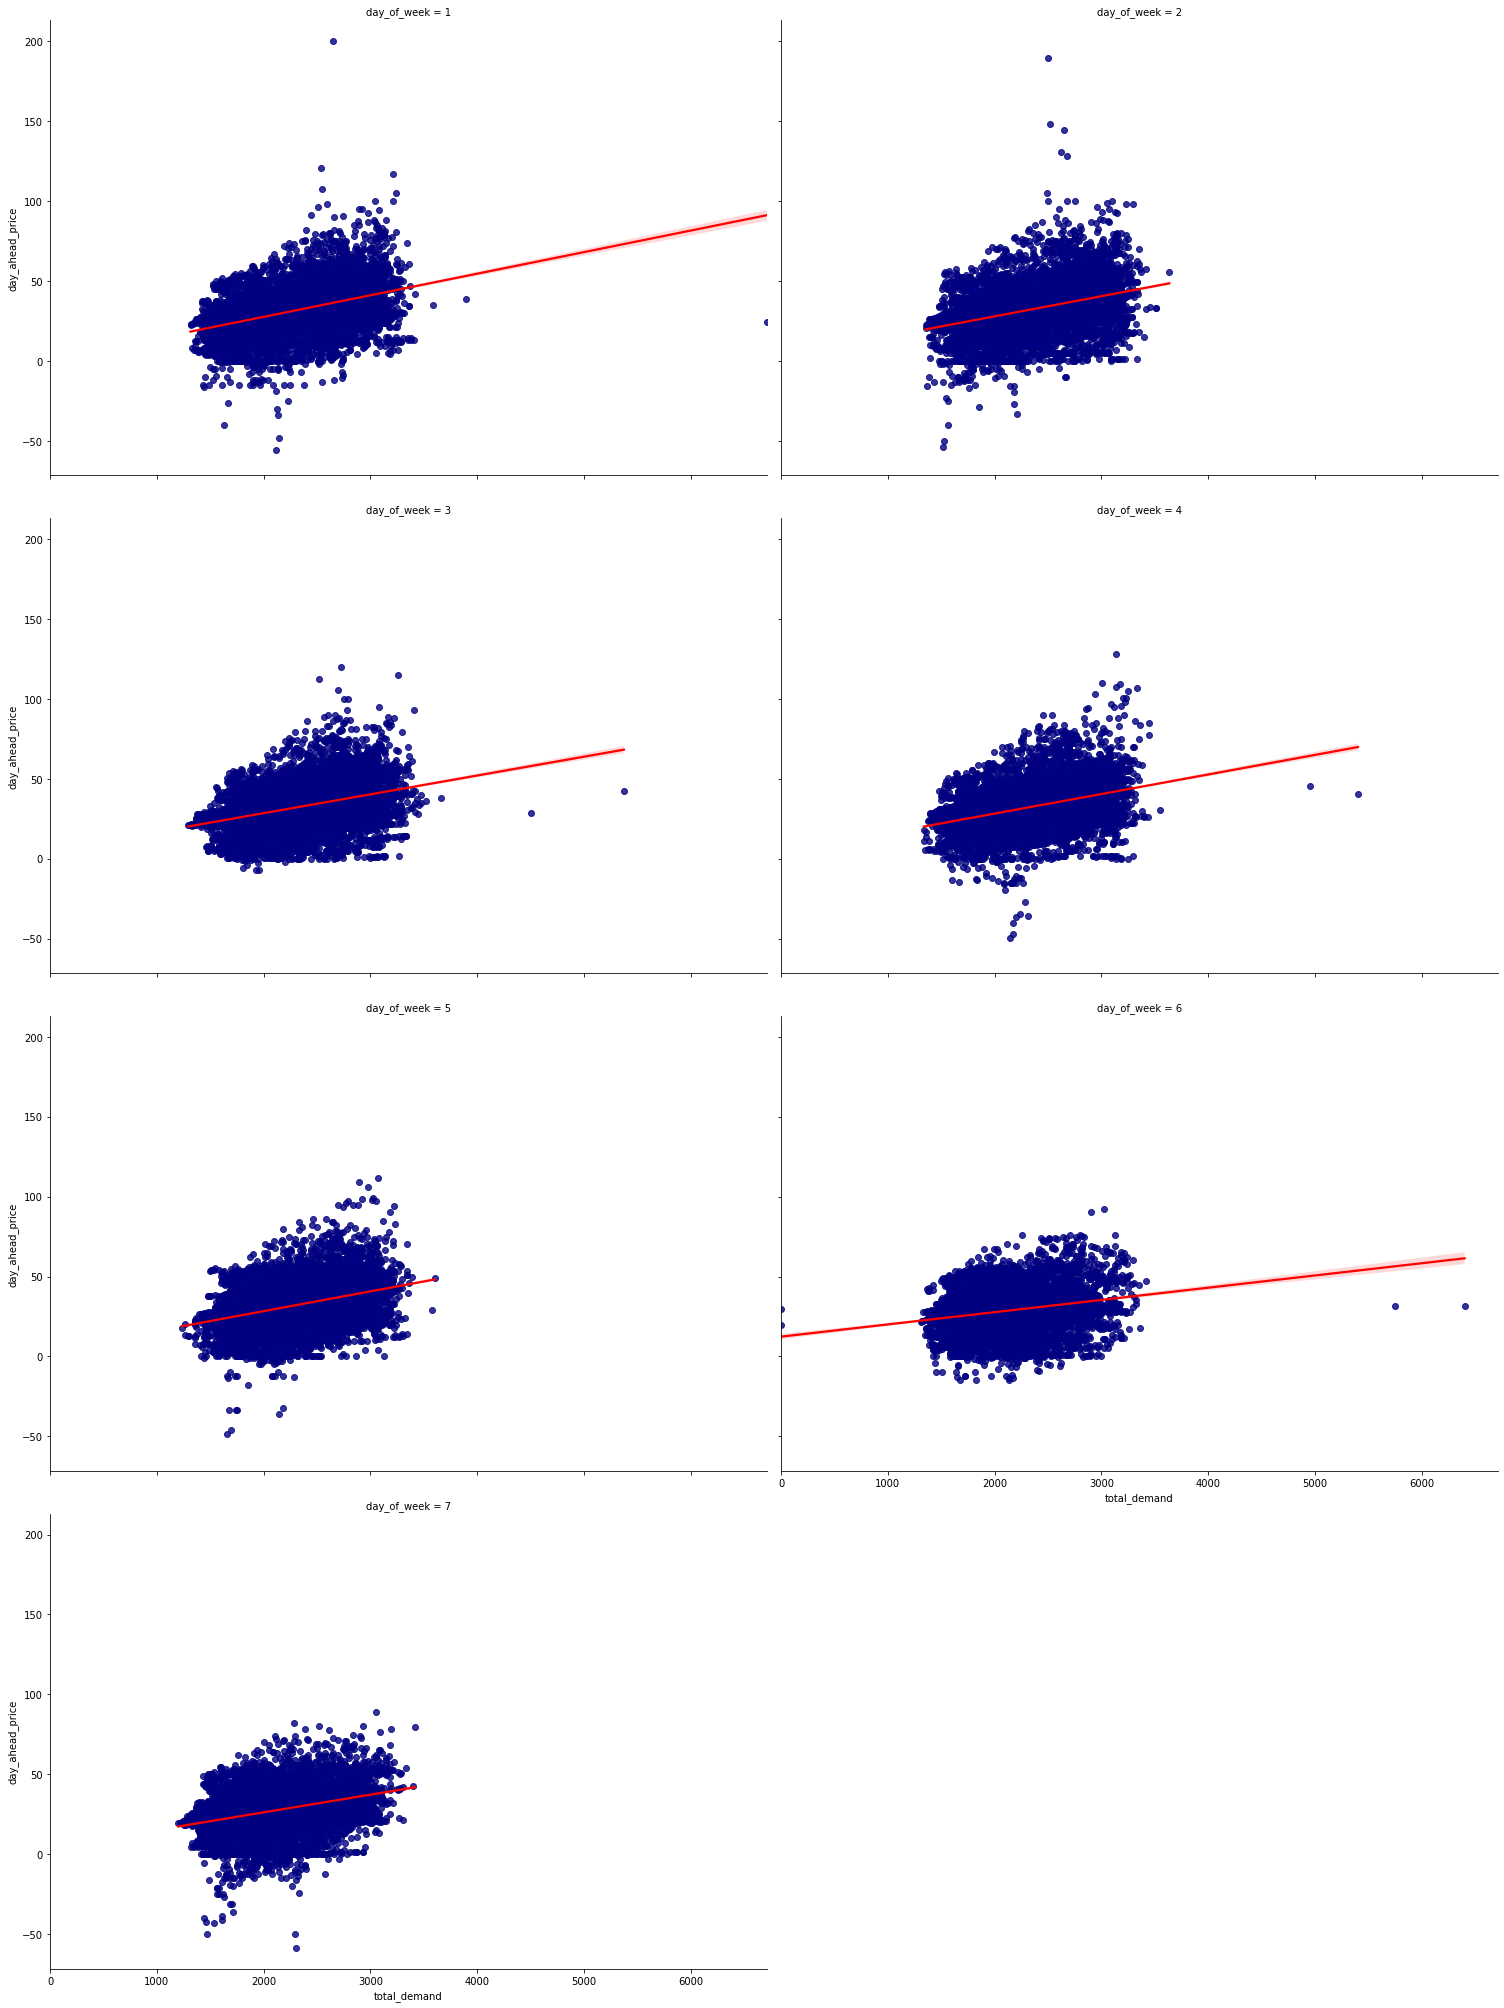

In [26]:
g = sns.FacetGrid(loads, col="day_of_week",col_wrap=2)
g.fig.set_size_inches(21,28)
g.map(sns.regplot, "total_demand","day_ahead_price",color="navy",line_kws={"color": "red"});

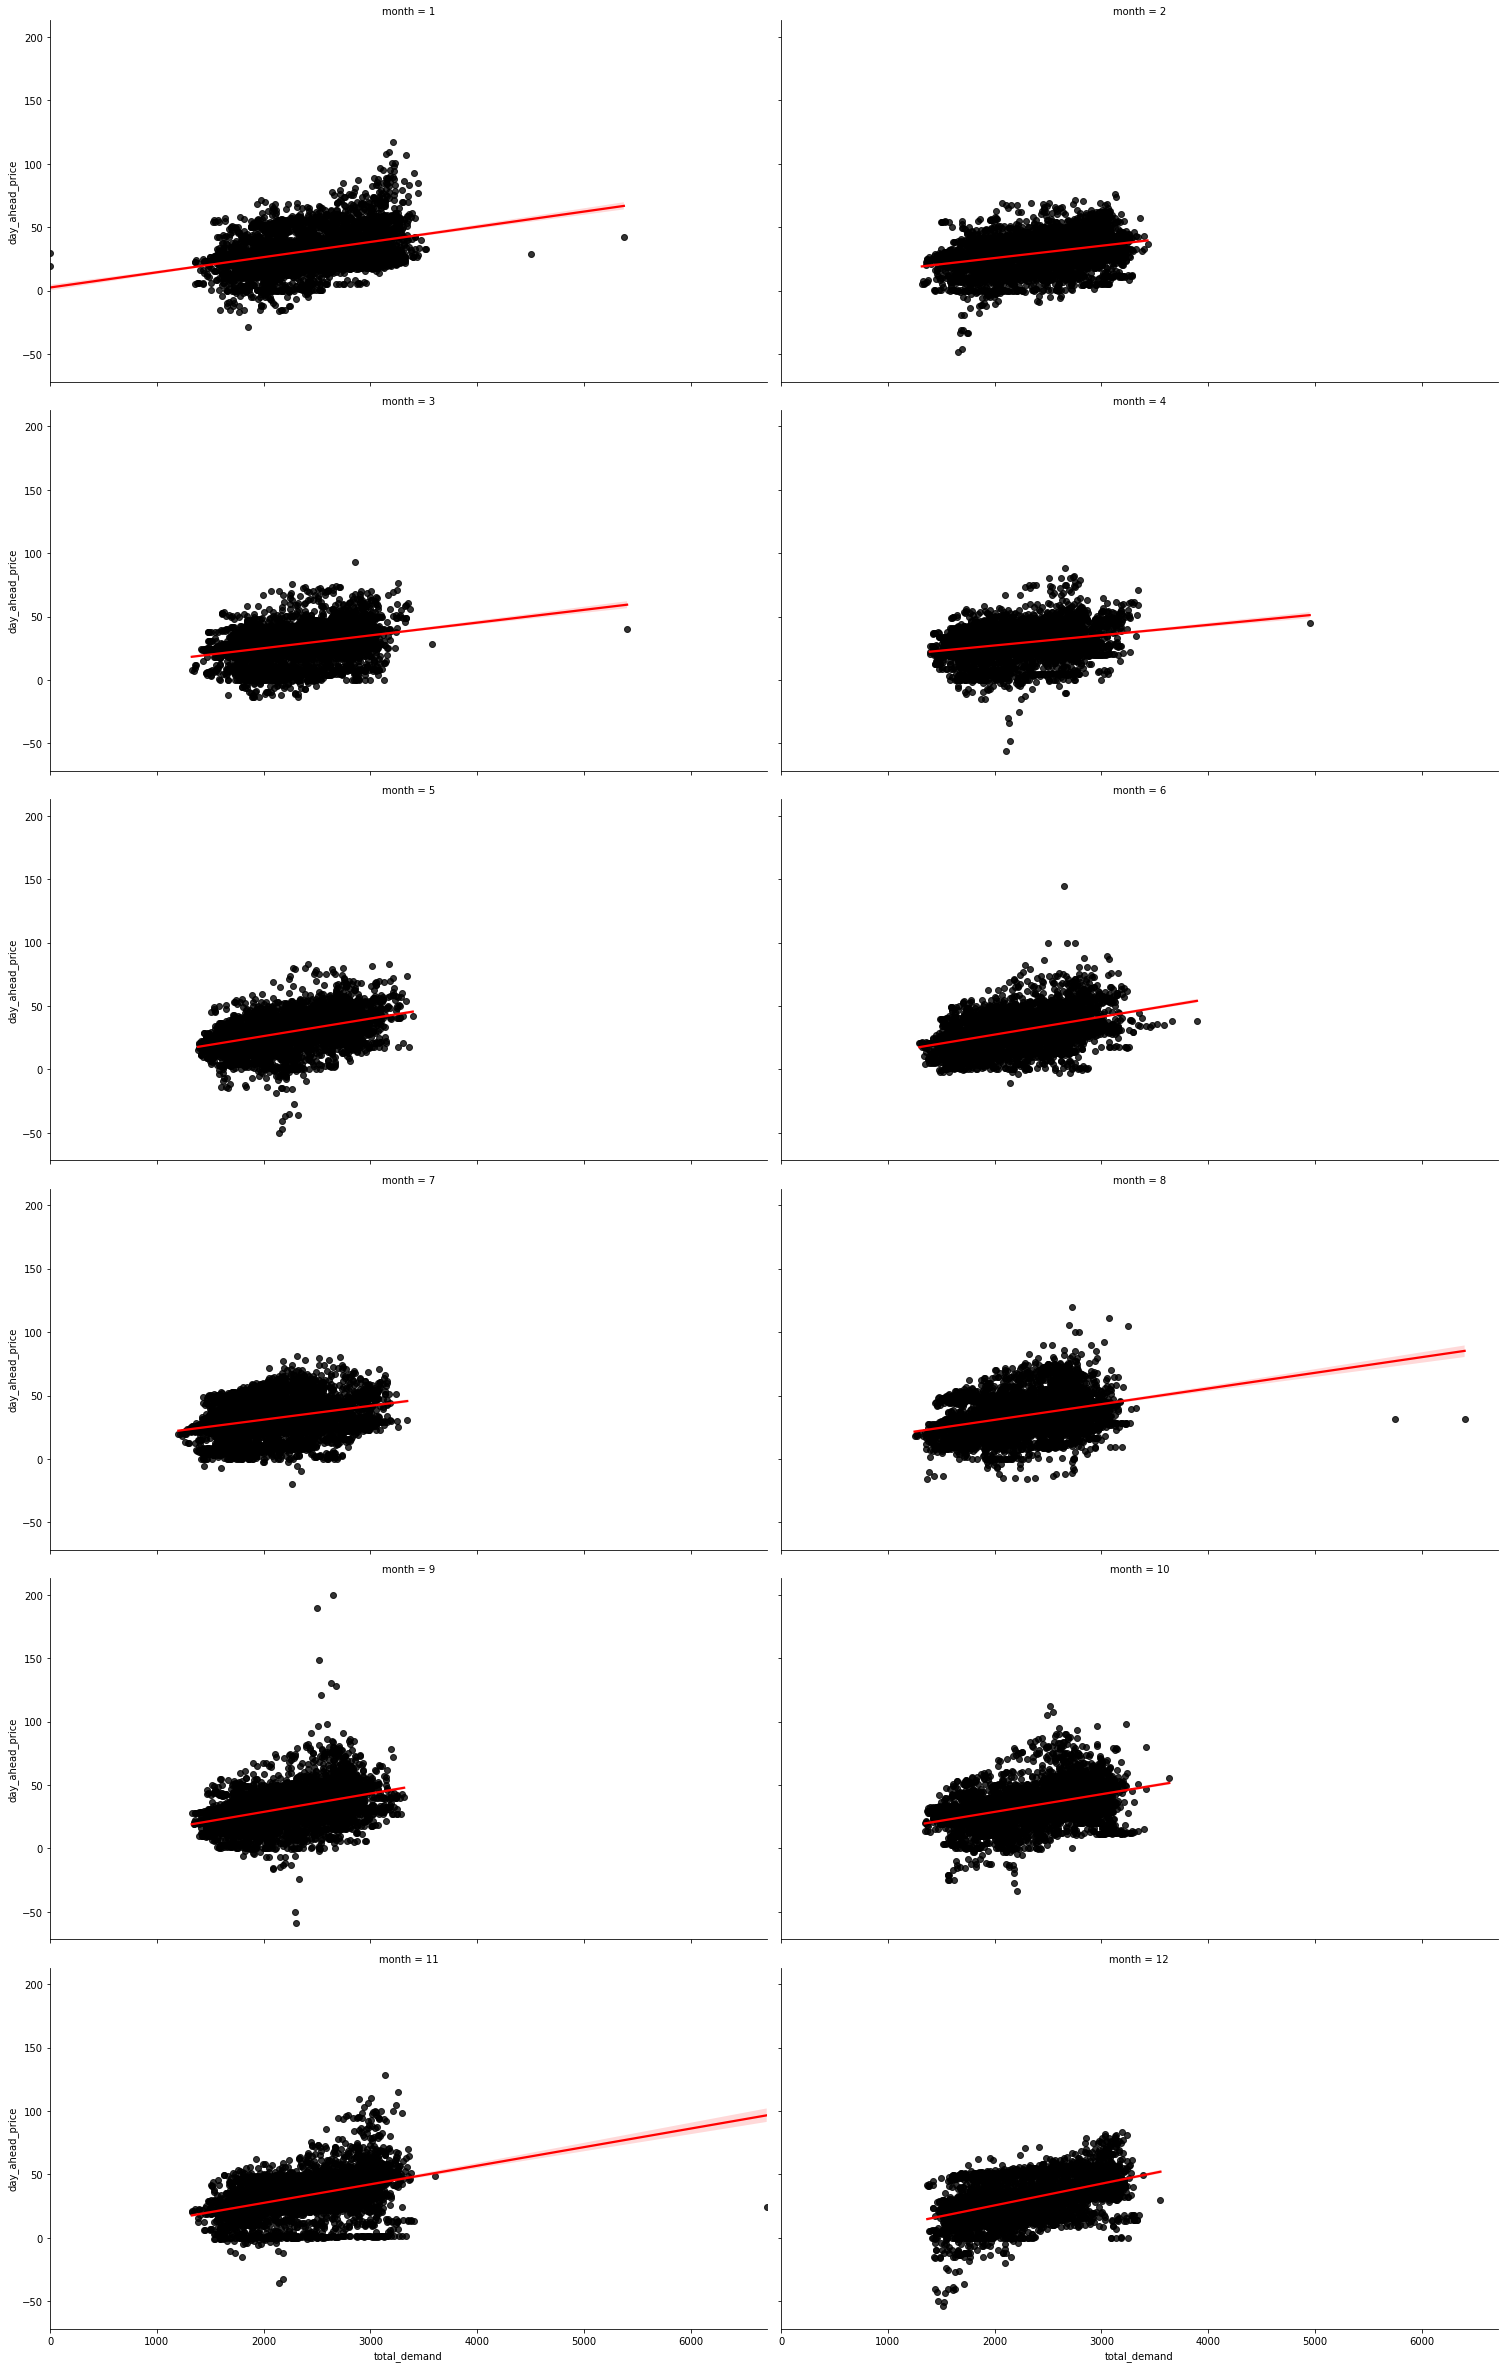

In [27]:
g = sns.FacetGrid(loads, col="month",col_wrap=2)
g.fig.set_size_inches(21,33)
g.map(sns.regplot, "total_demand","day_ahead_price",color="black",line_kws={"color": "red"});

# Feature Engineering

## Convert a Time Series to a Supervised Learning Problem in Python

## Scaler
- Min-Max Scaler

## Train Test split
- Some studies have concluded that a 33/67 split ratio optimizes model performance

## Train Test split

# Model performance

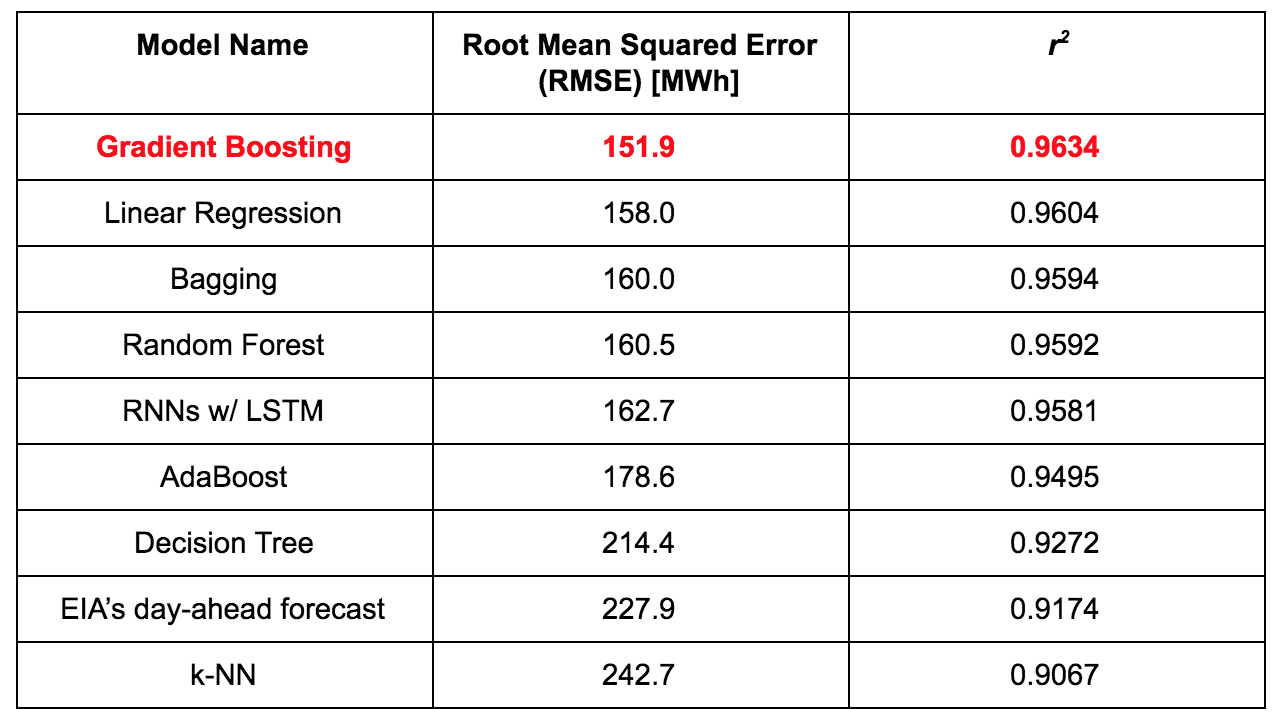

In [28]:
from IPython.display import Image
Image(filename = "/Users/vingtcoeurs/Downloads/models.png", width = 660, height = 300)

# Data exploration

## Data preprocessing

In [29]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

path = "/Users/vingtcoeurs/code/Guli-Y/electricity_price_predictor/raw_data"
df = pd.read_csv(os.path.join(path,"cleaned_df.csv"))
df.head()

,Unnamed: 0,Day-ahead Price [EUR/MWh],time,Actual Total Load [MW] - BZN|DK1
0,0,25.02,2015-01-01 00:00:00,1877.0
1,1,18.29,2015-01-01 01:00:00,1843.0
2,2,16.04,2015-01-01 02:00:00,1795.0
3,3,14.60,2015-01-01 03:00:00,1745.0
4,4,14.95,2015-01-01 04:00:00,1743.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51702 entries, 0 to 51701
Data columns (total 4 columns):
Unnamed: 0                          51702 non-null int64
Day-ahead Price [EUR/MWh]           51702 non-null float64
time                                51702 non-null object
Actual Total Load [MW] - BZN|DK1    51702 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB


In [31]:
loads = df.copy().drop(columns="Unnamed: 0")
new_columns=["day_ahead_price","timestamp","total_demand"]
loads.columns = new_columns
loads = loads[["timestamp","day_ahead_price","total_demand"]]
loads.head()

,timestamp,day_ahead_price,total_demand
0,2015-01-01 00:00:00,25.02,1877.0
1,2015-01-01 01:00:00,18.29,1843.0
2,2015-01-01 02:00:00,16.04,1795.0
3,2015-01-01 03:00:00,14.60,1745.0
4,2015-01-01 04:00:00,14.95,1743.0


In [32]:
loads["time"] = pd.to_datetime(loads["timestamp"])
loads.head()

,timestamp,day_ahead_price,total_demand,time
0,2015-01-01 00:00:00,25.02,1877.0,2015-01-01 00:00:00
1,2015-01-01 01:00:00,18.29,1843.0,2015-01-01 01:00:00
2,2015-01-01 02:00:00,16.04,1795.0,2015-01-01 02:00:00
3,2015-01-01 03:00:00,14.60,1745.0,2015-01-01 03:00:00
4,2015-01-01 04:00:00,14.95,1743.0,2015-01-01 04:00:00


In [33]:
loads["day_of_month"] = loads["time"].dt.day
loads["month"] = loads["time"].dt.month
loads["month_name"] = loads["time"].dt.month_name()
loads["year"] = loads["time"].dt.year
loads["day_of_week"] = loads["time"].dt.weekday+1
loads["weekday_name"] = loads["time"].dt.weekday_name
loads["hour"] = loads["time"].dt.hour
loads.tail()

,timestamp,day_ahead_price,total_demand,time,day_of_month,month,month_name,year,day_of_week,weekday_name,hour
51697,2020-11-23 07:00:00,4.08,3182.0,2020-11-23 07:00:00,23,11,November,2020,1,Monday,7
51698,2020-11-23 08:00:00,6.99,3255.0,2020-11-23 08:00:00,23,11,November,2020,1,Monday,8
51699,2020-11-23 09:00:00,6.95,3213.0,2020-11-23 09:00:00,23,11,November,2020,1,Monday,9
51700,2020-11-23 10:00:00,5.92,3181.0,2020-11-23 10:00:00,23,11,November,2020,1,Monday,10
51701,2020-11-23 11:00:00,4.95,3167.0,2020-11-23 11:00:00,23,11,November,2020,1,Monday,11


In [34]:
loads["calendar_month"] = loads["month_name"].astype(str)+"_"+loads["year"].astype(str)
loads.head()

,timestamp,day_ahead_price,total_demand,time,day_of_month,month,month_name,year,day_of_week,weekday_name,hour,calendar_month
0,2015-01-01 00:00:00,25.02,1877.0,2015-01-01 00:00:00,1,1,January,2015,4,Thursday,0,January_2015
1,2015-01-01 01:00:00,18.29,1843.0,2015-01-01 01:00:00,1,1,January,2015,4,Thursday,1,January_2015
2,2015-01-01 02:00:00,16.04,1795.0,2015-01-01 02:00:00,1,1,January,2015,4,Thursday,2,January_2015
3,2015-01-01 03:00:00,14.60,1745.0,2015-01-01 03:00:00,1,1,January,2015,4,Thursday,3,January_2015
4,2015-01-01 04:00:00,14.95,1743.0,2015-01-01 04:00:00,1,1,January,2015,4,Thursday,4,January_2015


In [35]:
#import holidays
#holidays = holidays.DK
#all_holidays = []
#for y in range(2015,2021):
#    for day in holidays(years=y).keys(): 
#        all_holidays.append(day)
#all_holidays

In [36]:
#loads["time"][0].strftime("%Y,%m,%d")

## Data exploration

### Data visualization

In [37]:
loads_per_hour = loads.set_index("time")
loads_per_hour.head()

,timestamp,day_ahead_price,total_demand,day_of_month,month,month_name,year,day_of_week,weekday_name,hour,calendar_month
time,,,,,,,,,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,25.02,1877.0,1,1,January,2015,4,Thursday,0,January_2015
2015-01-01 01:00:00,2015-01-01 01:00:00,18.29,1843.0,1,1,January,2015,4,Thursday,1,January_2015
2015-01-01 02:00:00,2015-01-01 02:00:00,16.04,1795.0,1,1,January,2015,4,Thursday,2,January_2015
2015-01-01 03:00:00,2015-01-01 03:00:00,14.60,1745.0,1,1,January,2015,4,Thursday,3,January_2015
2015-01-01 04:00:00,2015-01-01 04:00:00,14.95,1743.0,1,1,January,2015,4,Thursday,4,January_2015


<AxesSubplot:xlabel='time', ylabel='total_demand'>

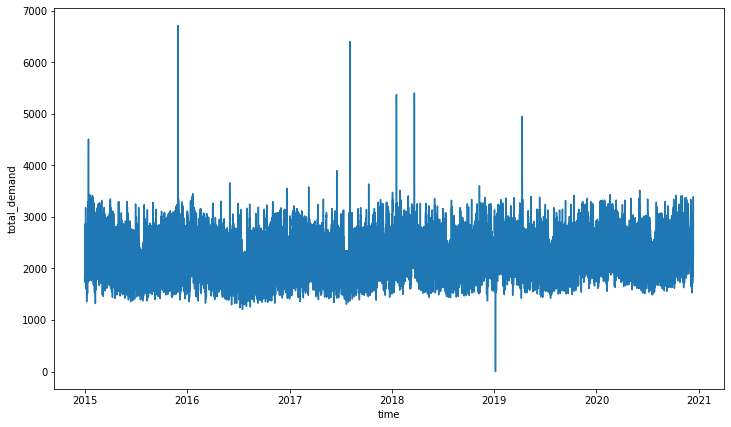

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.lineplot(x="time",y="total_demand",data=loads_per_hour)

### Statistic summary

In [39]:
targets = loads[["total_demand","day_ahead_price"]]
targets.describe()

,total_demand,day_ahead_price
count,51702.000000,51702.000000
mean,2279.142473,31.119147
std,452.290332,15.000098
min,0.000000,-58.800000
25%,1910.000000,22.362500
50%,2242.000000,30.200000
75%,2654.000000,39.980000
max,6712.000000,200.040000


### Distribution of targets

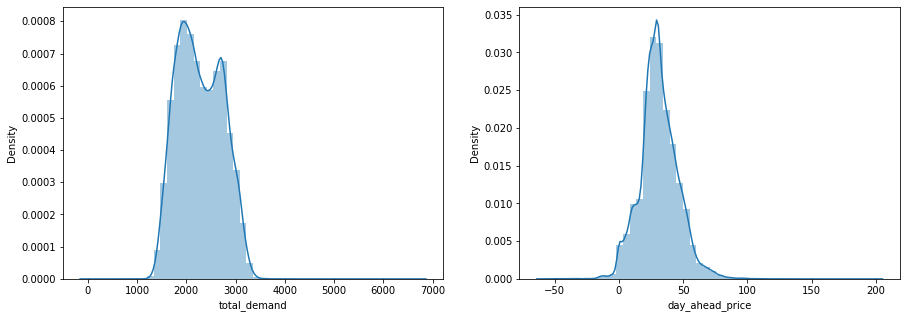

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
for ax, col in zip(axs, targets.columns): 
    sns.distplot(targets[col], ax=ax,)

Demand seems to have bimodal distribution (off peak/peak hours structure) while Prices has quasi normal distribution with skew to the left 

### Demand

#### Demand - overall trend of rising consumption

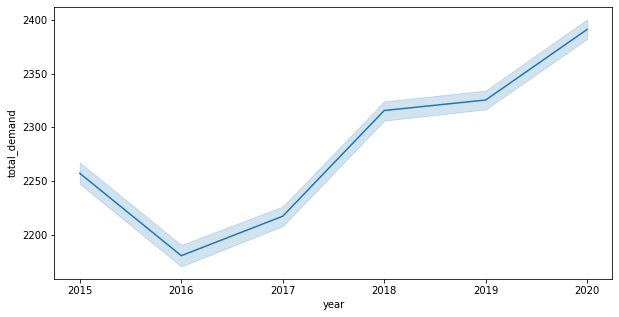

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
sns.lineplot(x="year",y="total_demand",data=loads);

#### Demand - Hourly seasonality

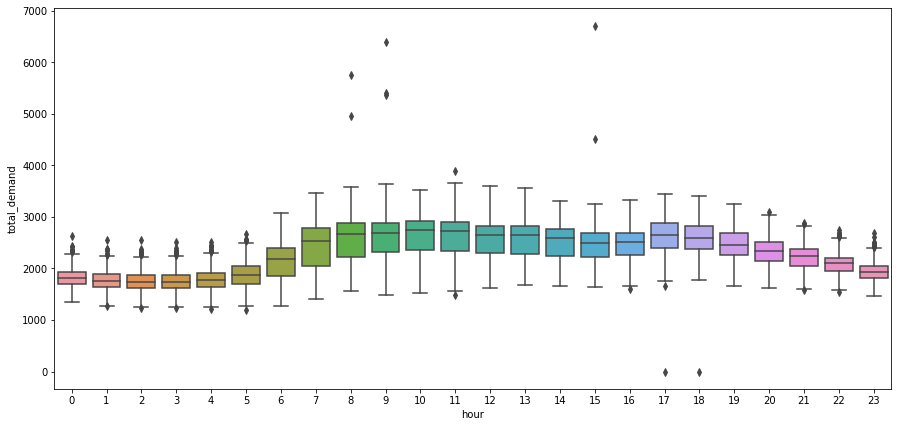

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x="hour",y="total_demand",data=loads);

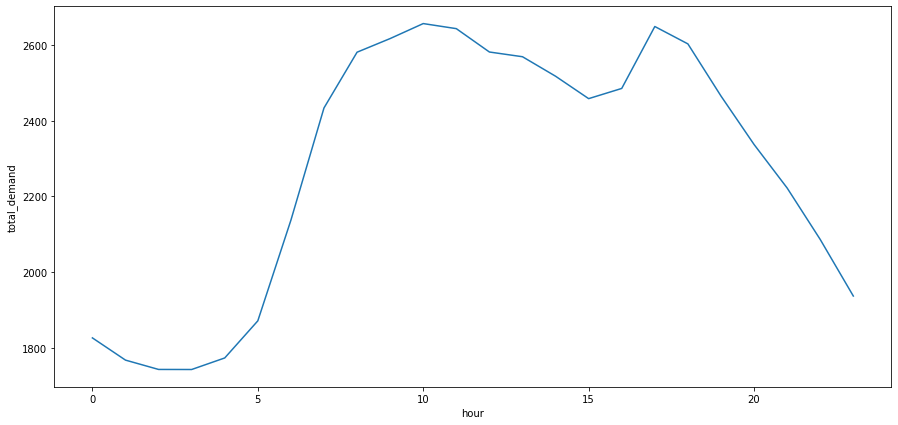

In [43]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='hour', y='total_demand',ci=None);

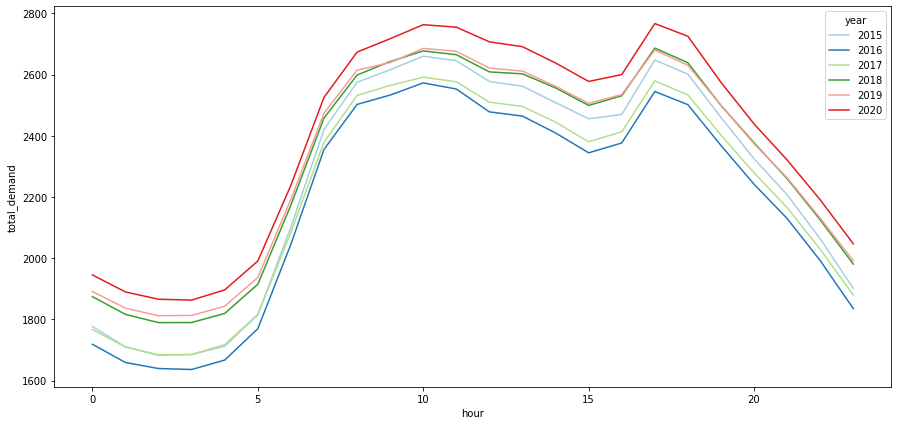

In [44]:
plt.figure(figsize=(15,7))
sns.lineplot(x="hour",y="total_demand",hue="year",data=loads,ci=None,palette="Paired");

#### Demand - Week seasonality

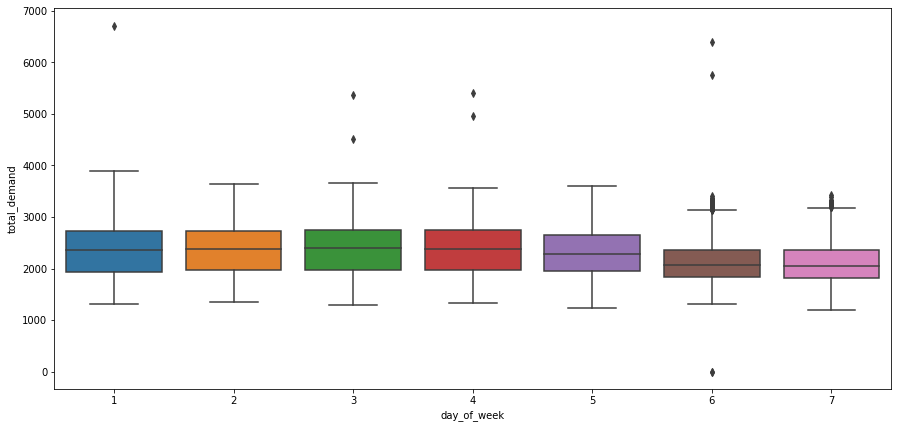

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_week",y="total_demand",data=loads);

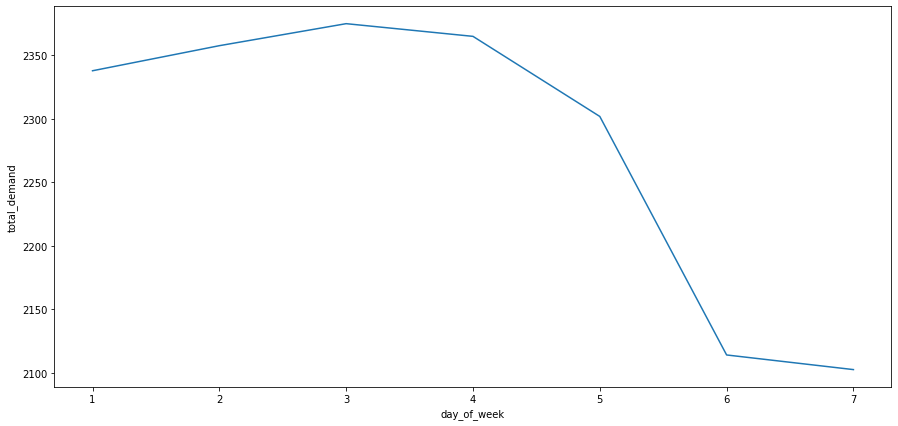

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='day_of_week', y='total_demand',ci=None);

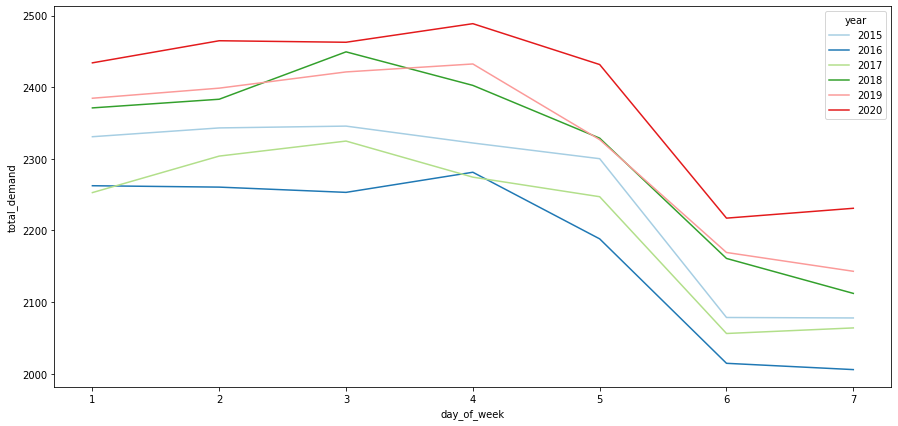

In [47]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_week",y="total_demand",hue="year",data=loads,ci=None,palette="Paired");

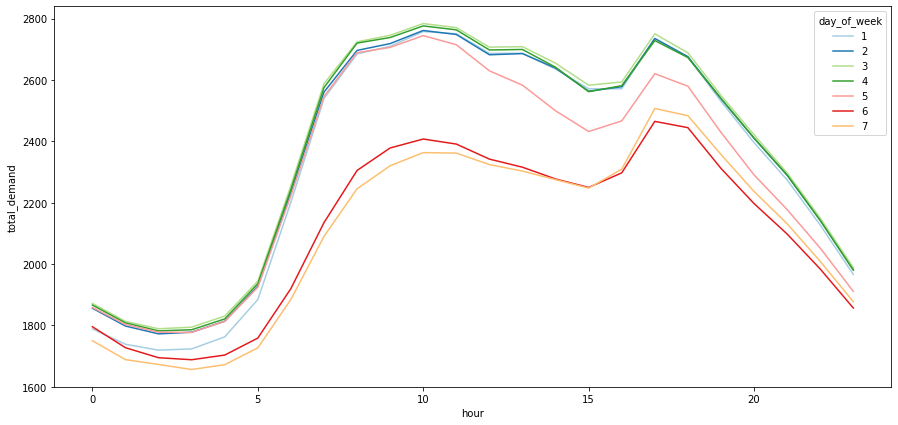

In [48]:
plt.figure(figsize=(15,7))
sns.lineplot(x="hour",y="total_demand",hue="day_of_week",data=loads,ci=None,palette="Paired");

#### Demand - Month seasonality

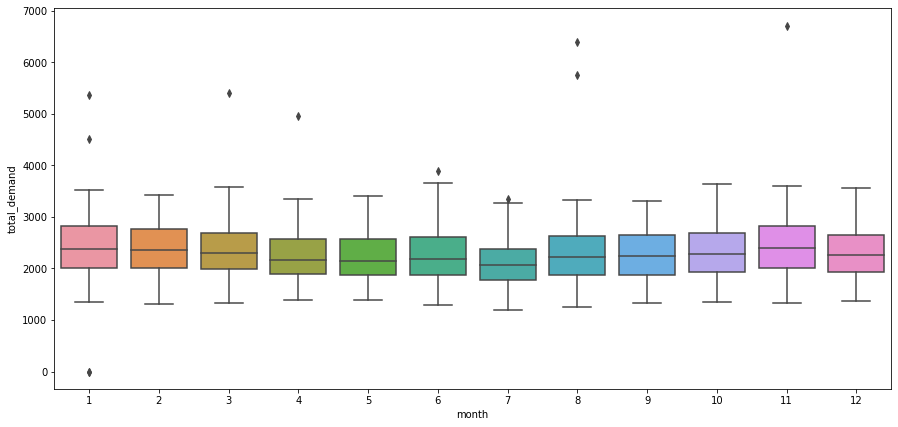

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(x="month",y="total_demand",data=loads);

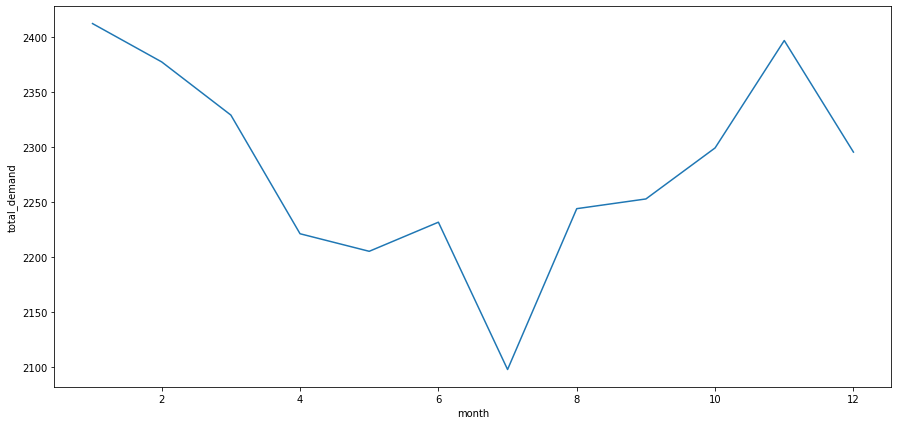

In [50]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='month', y='total_demand',ci=None);

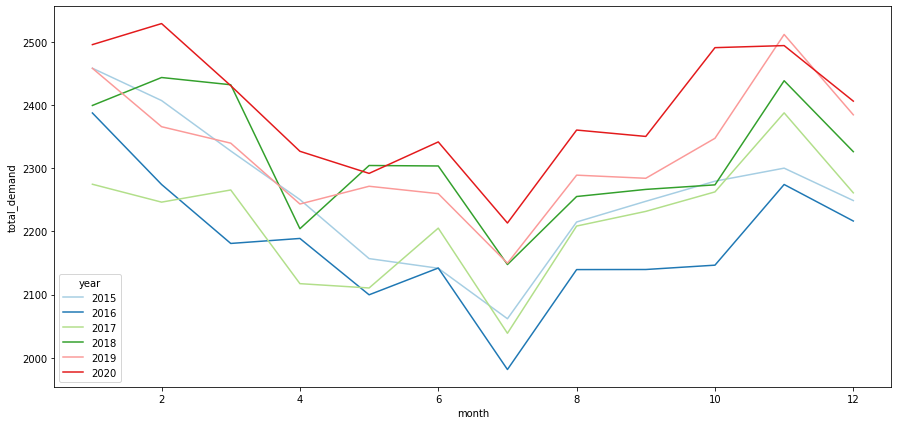

In [51]:
plt.figure(figsize=(15,7))
sns.lineplot(x="month",y="total_demand",hue="year",data=loads,ci=None,palette="Paired");

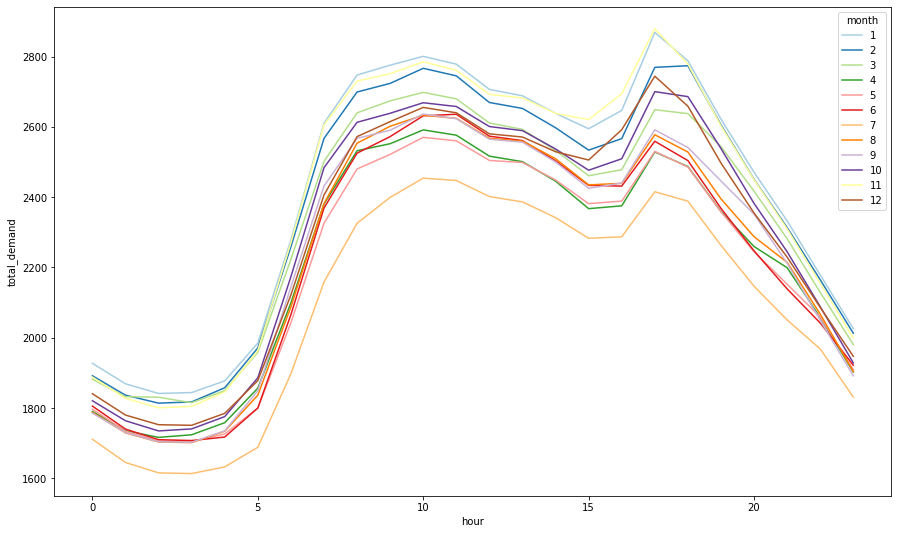

In [52]:
plt.figure(figsize=(15,9))
sns.lineplot(x="hour",y="total_demand",hue="month",data=loads,ci=None,palette="Paired");

### Prices

#### Prices - overall trend - Peak in 2018 before return to 2015 values

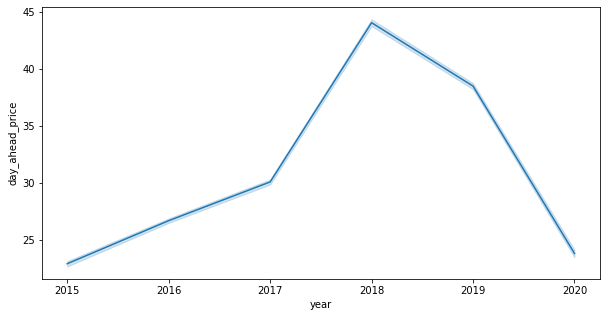

In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year",y="day_ahead_price",data=loads);

#### Prices - Hourly seasonality

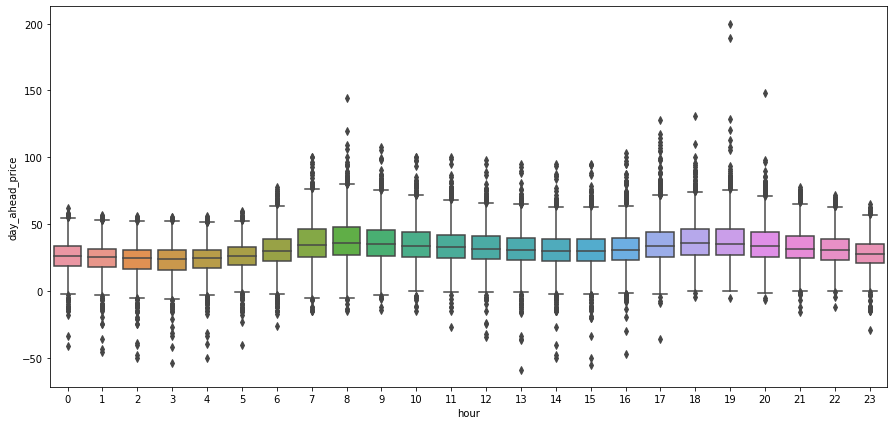

In [54]:
plt.figure(figsize=(15,7))
sns.boxplot(x="hour",y="day_ahead_price",data=loads);

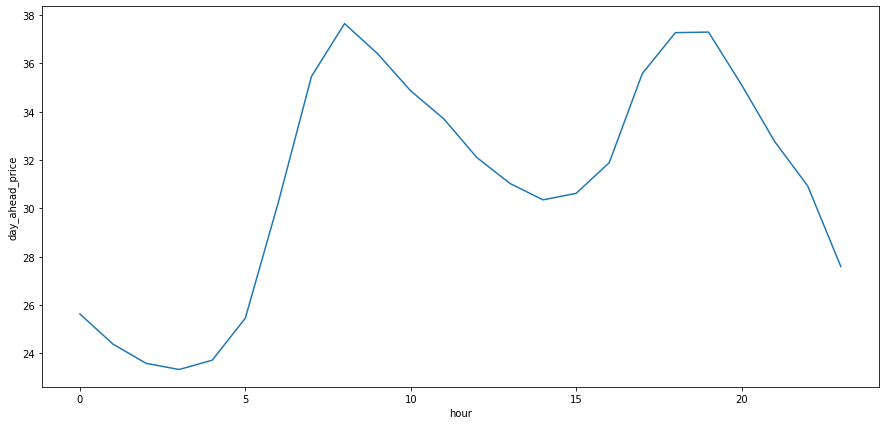

In [55]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x='hour', y='day_ahead_price',ci=None);

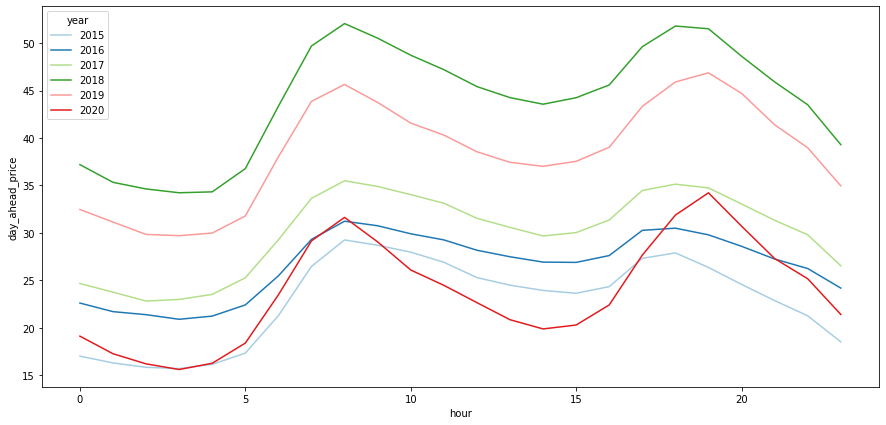

In [56]:
plt.figure(figsize=(15,7))
sns.lineplot(x="hour",y='day_ahead_price',hue="year",data=loads,ci=None,palette="Paired");

#### Prices - Week seasonality

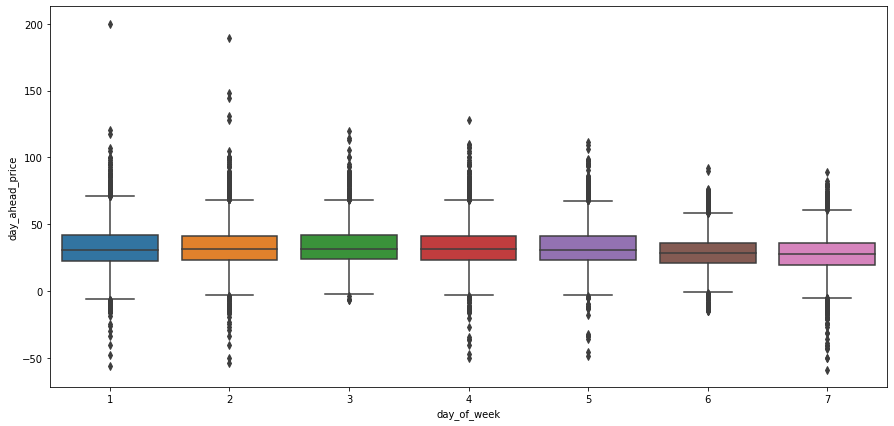

In [57]:
plt.figure(figsize=(15,7))
sns.boxplot(data=loads, x="day_of_week", y='day_ahead_price');

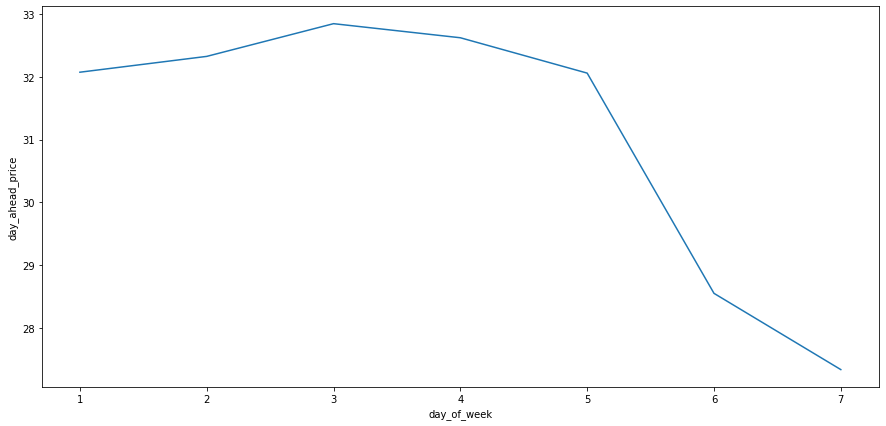

In [58]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x="day_of_week", y="day_ahead_price",ci=None);

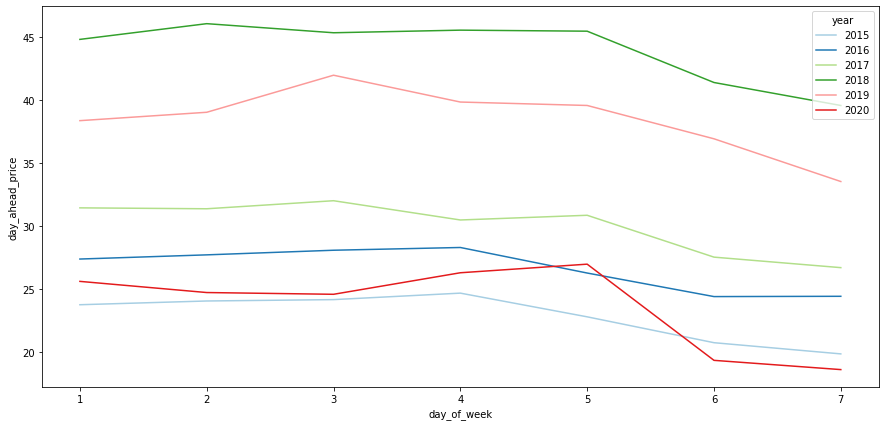

In [59]:
plt.figure(figsize=(15,7))
sns.lineplot(x="day_of_week",y='day_ahead_price',hue="year",data=loads,ci=None,palette="Paired");

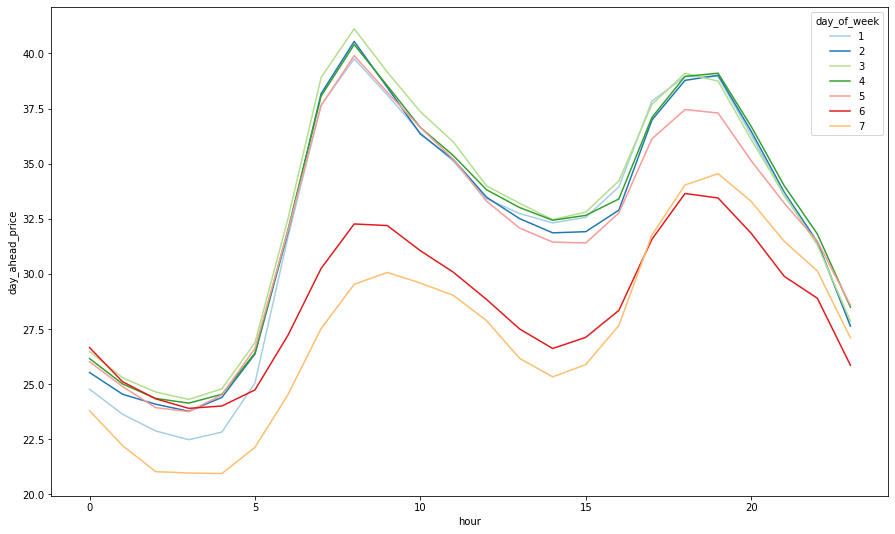

In [60]:
plt.figure(figsize=(15,9))
sns.lineplot(x="hour",y='day_ahead_price',hue="day_of_week",data=loads,ci=None,palette="Paired");

#### Prices - Month seasonality

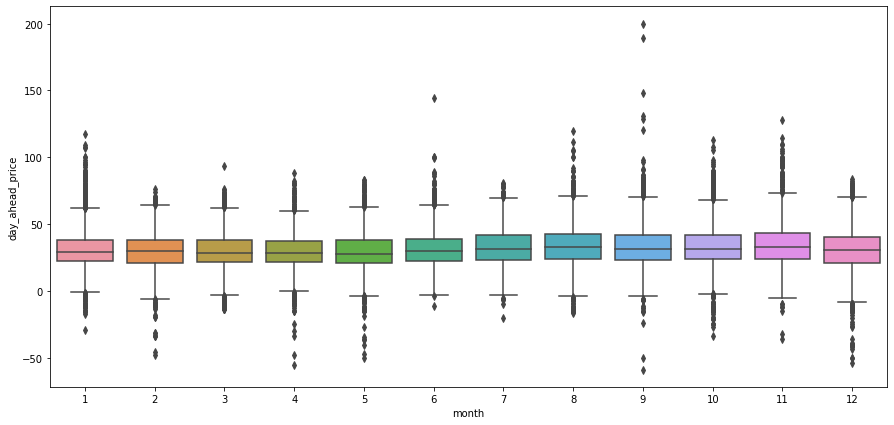

In [61]:
plt.figure(figsize=(15,7))
sns.boxplot(data=loads, x="month", y='day_ahead_price');

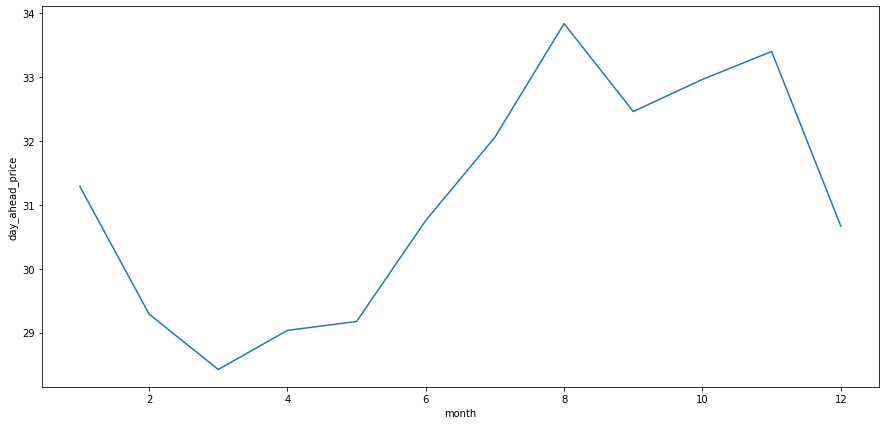

In [62]:
plt.figure(figsize=(15,7))
sns.lineplot(data=loads, x="month", y="day_ahead_price",ci=None);

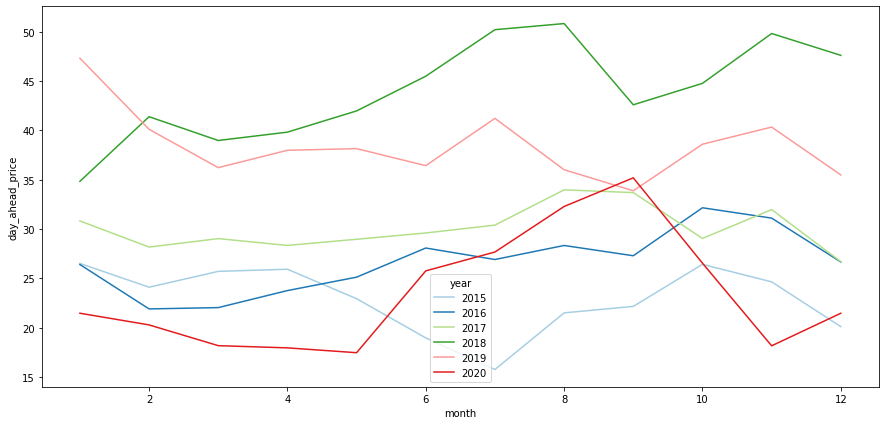

In [63]:
plt.figure(figsize=(15,7))
sns.lineplot(x="month",y='day_ahead_price',hue="year",data=loads,ci=None,palette="Paired");

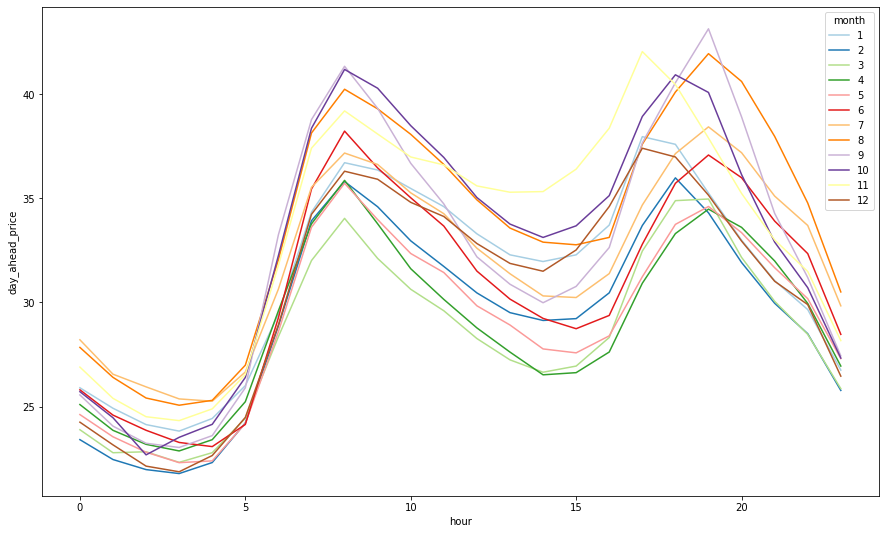

In [64]:
plt.figure(figsize=(15,9))
sns.lineplot(x="hour",y='day_ahead_price',hue="month",data=loads,ci=None,palette="Paired");

### Autocorrelation

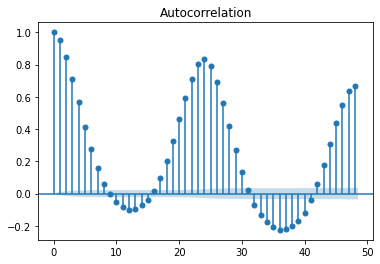

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(loads.total_demand, lags=48);

24 hours cycles ? with a loss of correlation every other day

### Decomposition

#### Demand

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
add_result_load = seasonal_decompose(loads["total_demand"],model="additive",period=24*365)

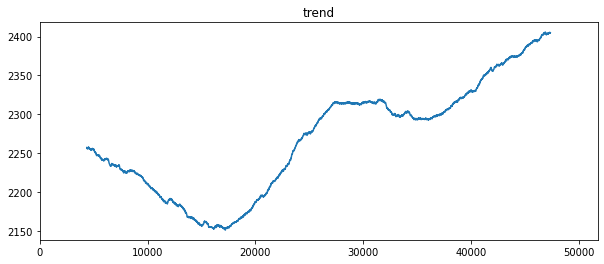

In [67]:
plt.figure(figsize=(10,4))
add_result_load.trend.plot(title="trend");

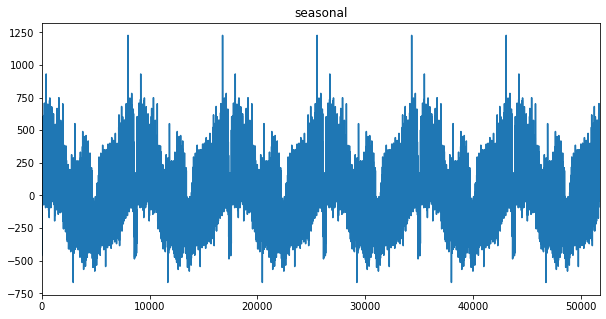

In [68]:
plt.figure(figsize=(10,5))
add_result_load.seasonal.plot(title="seasonal");

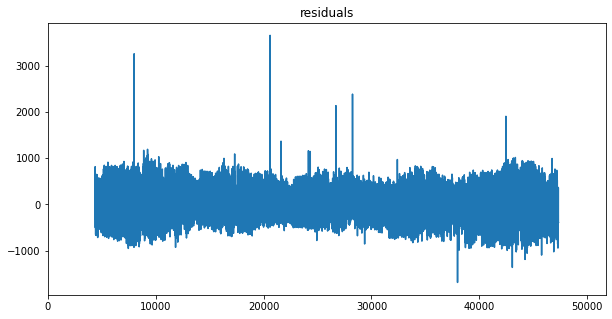

In [69]:
plt.figure(figsize=(10,5))
add_result_load.resid.plot(title="residuals");

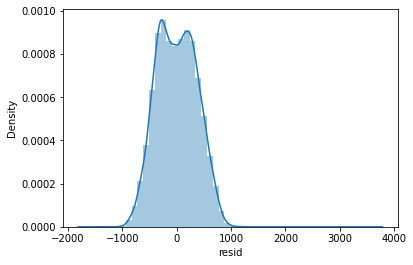

In [70]:
sns.distplot(add_result_load.resid);

Bimodal distribution of residuals ???

#### Prices

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
add_result = seasonal_decompose(loads["day_ahead_price"],model="additive",period=24*365)

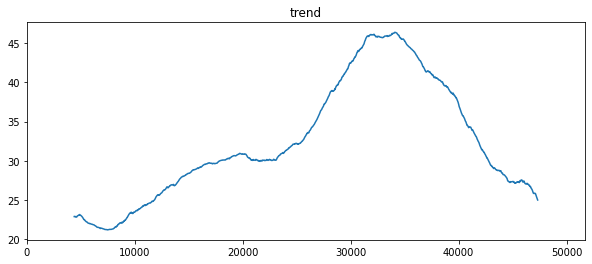

In [72]:
plt.figure(figsize=(10,4))
add_result.trend.plot(title="trend");

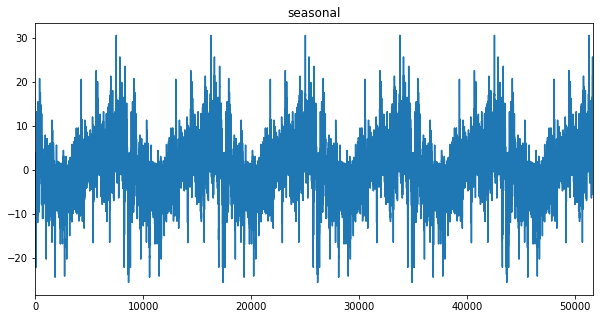

In [73]:
plt.figure(figsize=(10,5))
add_result.seasonal.plot(title="seasonal");

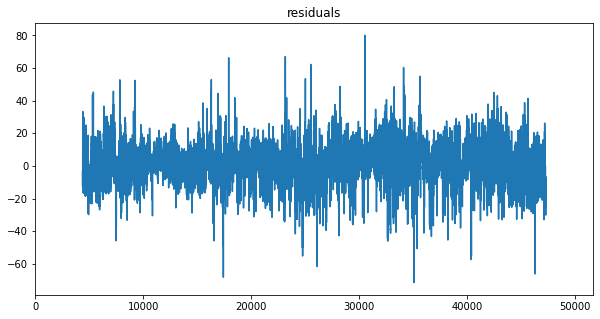

In [74]:
plt.figure(figsize=(10,5))
add_result.resid.plot(title="residuals");

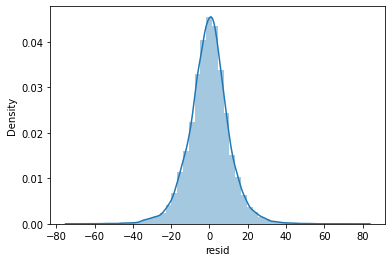

In [75]:
sns.distplot(add_result.resid);

Residuals are normally distributed ==> Mean is close to zero

In [76]:
#from warnings import filterwarnings
#filterwarnings("ignore")
#monthly_loads = loads[["time","plt.figure(figsize=(10,4))"]].groupby([loads["time"].dt.year,loads["time"].dt.month]).sum().plot(figsize=(10,5))

# Exogenous features

## VIF - Multicolinearity

In [84]:
from electricity_price_predictor.data import get_shifted_load,get_shifted_price,get_weather,get_holidays,get_days_dummies

In [278]:
production = pd.read_csv("/Users/vingtcoeurs/Downloads/productionconsumptionsettlement.csv")
production.head()

,ExchangeGE_MWh,HourUTC,TransmissionLossMWh,OffshoreWindLt100MW_MWh,PowerToHeatMWh,OnshoreWindLt50kW_MWh,ExchangeNO_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,...,SolarPowerSelfConMWh,ExchangeNL_MWh,LocalPowerMWh,HourDK,PriceArea,LocalPowerSelfConMWh,OnshoreWindGe50kW_MWh,GrossConsumptionMWh,ExchangeGreatBelt_MWh,SolarPowerLt10kW_MWh
0,570.60,2020-11-18T22:00:00,-29.9550,69.241621,287.448717,17.027991,-659.564,129.17251,0.002987,917.908635,...,0.170894,-0.63,181.482178,2020-11-18T23:00:00,DK1,0.060375,1726.722800,2362.123374,-591.6,0.021782
1,415.30,2020-11-18T21:00:00,-26.4724,69.311505,232.284072,17.031704,-543.732,138.06312,0.003785,979.052898,...,-0.055510,-0.60,206.600711,2020-11-18T22:00:00,DK1,0.060659,1937.467487,2628.465603,-591.6,0.022378
2,421.19,2020-11-18T20:00:00,-17.4066,69.153656,236.172386,16.558283,-203.944,107.97530,0.003258,909.795043,...,-0.049935,-0.60,216.592558,2020-11-18T21:00:00,DK1,0.057240,1879.142855,2825.747594,-591.7,0.022254
3,367.22,2020-11-18T19:00:00,-15.4531,86.723072,230.586103,16.364780,18.040,148.20276,0.003067,891.065528,...,-0.058530,-0.60,202.468927,2020-11-18T20:00:00,DK1,0.054376,1889.218317,3028.706290,-591.6,0.028261
4,305.49,2020-11-18T18:00:00,-12.0949,86.300697,155.940747,16.108948,114.376,154.82271,0.001930,888.092495,...,-0.054135,-0.60,201.690080,2020-11-18T19:00:00,DK1,0.053685,1991.504240,3167.828975,-591.6,0.024941


In [279]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
ExchangeGE_MWh              100000 non-null float64
HourUTC                     100000 non-null object
TransmissionLossMWh         99990 non-null float64
OffshoreWindLt100MW_MWh     100000 non-null float64
PowerToHeatMWh              60336 non-null float64
OnshoreWindLt50kW_MWh       100000 non-null float64
ExchangeNO_MWh              100000 non-null float64
CentralPowerMWh             100000 non-null float64
SolarPowerGe10Lt40kW_MWh    100000 non-null float64
OffshoreWindGe100MW_MWh     100000 non-null float64
ExchangeSE_MWh              100000 non-null float64
SolarPowerGe40kW_MWh        7752 non-null float64
HydroPowerMWh               100000 non-null float64
SolarPowerSelfConMWh        7752 non-null float64
ExchangeNL_MWh              12001 non-null float64
LocalPowerMWh               100000 non-null float64
HourDK                      100000 non-null object
PriceArea      

In [280]:
measures = production.drop(columns=["HourUTC","HourDK"]).columns
prod = production[["HourDK"] + list(measures)]
prod.head()

,HourDK,ExchangeGE_MWh,TransmissionLossMWh,OffshoreWindLt100MW_MWh,PowerToHeatMWh,OnshoreWindLt50kW_MWh,ExchangeNO_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,...,HydroPowerMWh,SolarPowerSelfConMWh,ExchangeNL_MWh,LocalPowerMWh,PriceArea,LocalPowerSelfConMWh,OnshoreWindGe50kW_MWh,GrossConsumptionMWh,ExchangeGreatBelt_MWh,SolarPowerLt10kW_MWh
0,2020-11-18T23:00:00,570.60,-29.9550,69.241621,287.448717,17.027991,-659.564,129.17251,0.002987,917.908635,...,1.482264,0.170894,-0.63,181.482178,DK1,0.060375,1726.722800,2362.123374,-591.6,0.021782
1,2020-11-18T22:00:00,415.30,-26.4724,69.311505,232.284072,17.031704,-543.732,138.06312,0.003785,979.052898,...,1.509519,-0.055510,-0.60,206.600711,DK1,0.060659,1937.467487,2628.465603,-591.6,0.022378
2,2020-11-18T21:00:00,421.19,-17.4066,69.153656,236.172386,16.558283,-203.944,107.97530,0.003258,909.795043,...,1.526659,-0.049935,-0.60,216.592558,DK1,0.057240,1879.142855,2825.747594,-591.7,0.022254
3,2020-11-18T20:00:00,367.22,-15.4531,86.723072,230.586103,16.364780,18.040,148.20276,0.003067,891.065528,...,1.548530,-0.058530,-0.60,202.468927,DK1,0.054376,1889.218317,3028.706290,-591.6,0.028261
4,2020-11-18T19:00:00,305.49,-12.0949,86.300697,155.940747,16.108948,114.376,154.82271,0.001930,888.092495,...,1.589120,-0.054135,-0.60,201.690080,DK1,0.053685,1991.504240,3167.828975,-591.6,0.024941


In [281]:
prod["time"] = pd.to_datetime(prod["HourDK"].replace("T"," "))
prod.head()

,HourDK,ExchangeGE_MWh,TransmissionLossMWh,OffshoreWindLt100MW_MWh,PowerToHeatMWh,OnshoreWindLt50kW_MWh,ExchangeNO_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,...,SolarPowerSelfConMWh,ExchangeNL_MWh,LocalPowerMWh,PriceArea,LocalPowerSelfConMWh,OnshoreWindGe50kW_MWh,GrossConsumptionMWh,ExchangeGreatBelt_MWh,SolarPowerLt10kW_MWh,time
0,2020-11-18T23:00:00,570.60,-29.9550,69.241621,287.448717,17.027991,-659.564,129.17251,0.002987,917.908635,...,0.170894,-0.63,181.482178,DK1,0.060375,1726.722800,2362.123374,-591.6,0.021782,2020-11-18 23:00:00
1,2020-11-18T22:00:00,415.30,-26.4724,69.311505,232.284072,17.031704,-543.732,138.06312,0.003785,979.052898,...,-0.055510,-0.60,206.600711,DK1,0.060659,1937.467487,2628.465603,-591.6,0.022378,2020-11-18 22:00:00
2,2020-11-18T21:00:00,421.19,-17.4066,69.153656,236.172386,16.558283,-203.944,107.97530,0.003258,909.795043,...,-0.049935,-0.60,216.592558,DK1,0.057240,1879.142855,2825.747594,-591.7,0.022254,2020-11-18 21:00:00
3,2020-11-18T20:00:00,367.22,-15.4531,86.723072,230.586103,16.364780,18.040,148.20276,0.003067,891.065528,...,-0.058530,-0.60,202.468927,DK1,0.054376,1889.218317,3028.706290,-591.6,0.028261,2020-11-18 20:00:00
4,2020-11-18T19:00:00,305.49,-12.0949,86.300697,155.940747,16.108948,114.376,154.82271,0.001930,888.092495,...,-0.054135,-0.60,201.690080,DK1,0.053685,1991.504240,3167.828975,-591.6,0.024941,2020-11-18 19:00:00


In [282]:
prodz = prod.drop(columns="HourDK").sort_values(by="time").set_index("time").loc["2015-01-01":]
prodz.head()

,ExchangeGE_MWh,TransmissionLossMWh,OffshoreWindLt100MW_MWh,PowerToHeatMWh,OnshoreWindLt50kW_MWh,ExchangeNO_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,ExchangeSE_MWh,...,HydroPowerMWh,SolarPowerSelfConMWh,ExchangeNL_MWh,LocalPowerMWh,PriceArea,LocalPowerSelfConMWh,OnshoreWindGe50kW_MWh,GrossConsumptionMWh,ExchangeGreatBelt_MWh,SolarPowerLt10kW_MWh
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,703.3,-121.0,42.329932,11.3,36.037823,-1137.6,788.3,0.0,633.42260,-348.8,...,1.737465,NaN,NaN,255.957172,DK1,0.0,1195.531801,1909.816793,-260.4,NaN
2015-01-01 01:00:00,684.3,-82.0,36.938565,11.3,0.939794,-1453.9,844.0,0.0,591.55785,-326.8,...,1.722133,NaN,NaN,249.236984,DK1,0.0,1202.936083,1836.231409,5.3,NaN
2015-01-01 02:00:00,681.4,-98.0,37.788579,11.6,0.953450,-1538.2,743.8,0.0,528.97895,-318.4,...,1.723660,NaN,NaN,248.662031,DK1,0.0,1199.156501,1763.263171,177.4,NaN
2015-01-01 03:00:00,817.1,-106.0,42.000662,11.8,1.069252,-1529.4,622.8,0.0,507.72750,-316.4,...,1.720773,NaN,NaN,234.131074,DK1,0.0,1335.010455,1689.959716,-25.8,NaN
2015-01-01 04:00:00,687.9,-107.0,45.700564,16.6,1.307552,-1603.4,481.2,0.0,614.14425,-299.2,...,1.726118,NaN,NaN,227.850461,DK1,0.0,1472.801627,1659.530572,29.5,NaN


In [295]:
wind = ["OffshoreWindLt100MW_MWh","OffshoreWindGe100MW_MWh","OnshoreWindLt50kW_MWh",
                "OnshoreWindGe50kW_MWh"]

non_wind = ["CentralPowerMWh","LocalPowerMWh","HydroPowerMWh","SolarPowerLt10kW_MWh",
            "SolarPowerGe10Lt40kW_MWh","SolarPowerGe40kW_MWh","TransmissionLossMWh"]

irrelevant_cols = ["PriceArea","ExchangeGE_MWh","PowerToHeatMWh","ExchangeNO_MWh","ExchangeSE_MWh",
                "ExchangeNL_MWh","GrossConsumptionMWh","ExchangeGreatBelt_MWh","LocalPowerSelfConMWh"]

substract_cols = "SolarPowerSelfConMWh"

In [301]:
prodz[substract_cols] = prodz[substract_cols].fillna(0)

In [302]:
prodz = prodz.drop(columns=irrelevant_cols)
prodz.head()

KeyError: "['PriceArea' 'ExchangeGE_MWh' 'PowerToHeatMWh' 'ExchangeNO_MWh'\n 'ExchangeSE_MWh' 'ExchangeNL_MWh' 'GrossConsumptionMWh'\n 'ExchangeGreatBelt_MWh' 'LocalPowerSelfConMWh'] not found in axis"

In [303]:
prodz["wind_prod"] = prodz[wind].sum(axis=1)
prodz.head()

,TransmissionLossMWh,OffshoreWindLt100MW_MWh,OnshoreWindLt50kW_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,SolarPowerGe40kW_MWh,HydroPowerMWh,SolarPowerSelfConMWh,LocalPowerMWh,OnshoreWindGe50kW_MWh,SolarPowerLt10kW_MWh,wind_prod,non_wind_prod
time,,,,,,,,,,,,,,
2015-01-01 00:00:00,-121.0,42.329932,36.037823,788.3,0.0,633.42260,NaN,1.737465,0.0,255.957172,1195.531801,NaN,1907.322156,924.994637
2015-01-01 01:00:00,-82.0,36.938565,0.939794,844.0,0.0,591.55785,NaN,1.722133,0.0,249.236984,1202.936083,NaN,1832.372292,1012.959117
2015-01-01 02:00:00,-98.0,37.788579,0.953450,743.8,0.0,528.97895,NaN,1.723660,0.0,248.662031,1199.156501,NaN,1766.877480,896.185691
2015-01-01 03:00:00,-106.0,42.000662,1.069252,622.8,0.0,507.72750,NaN,1.720773,0.0,234.131074,1335.010455,NaN,1885.807869,752.651847
2015-01-01 04:00:00,-107.0,45.700564,1.307552,481.2,0.0,614.14425,NaN,1.726118,0.0,227.850461,1472.801627,NaN,2133.953993,603.776579


<AxesSubplot:>

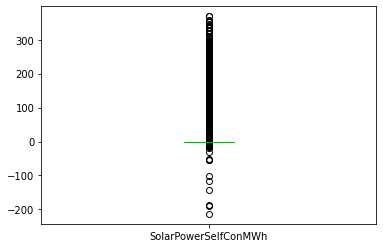

In [304]:
prodz["SolarPowerSelfConMWh"].plot(kind="box")
#"LocalPowerSelfConMWh","SolarPowerSelfConMWh","TransmissionLossMWh"]

In [305]:
prodz["non_wind_prod"] = prodz[non_wind].sum(axis=1)
prodz.head()

,TransmissionLossMWh,OffshoreWindLt100MW_MWh,OnshoreWindLt50kW_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,SolarPowerGe40kW_MWh,HydroPowerMWh,SolarPowerSelfConMWh,LocalPowerMWh,OnshoreWindGe50kW_MWh,SolarPowerLt10kW_MWh,wind_prod,non_wind_prod
time,,,,,,,,,,,,,,
2015-01-01 00:00:00,-121.0,42.329932,36.037823,788.3,0.0,633.42260,NaN,1.737465,0.0,255.957172,1195.531801,NaN,1907.322156,924.994637
2015-01-01 01:00:00,-82.0,36.938565,0.939794,844.0,0.0,591.55785,NaN,1.722133,0.0,249.236984,1202.936083,NaN,1832.372292,1012.959117
2015-01-01 02:00:00,-98.0,37.788579,0.953450,743.8,0.0,528.97895,NaN,1.723660,0.0,248.662031,1199.156501,NaN,1766.877480,896.185691
2015-01-01 03:00:00,-106.0,42.000662,1.069252,622.8,0.0,507.72750,NaN,1.720773,0.0,234.131074,1335.010455,NaN,1885.807869,752.651847
2015-01-01 04:00:00,-107.0,45.700564,1.307552,481.2,0.0,614.14425,NaN,1.726118,0.0,227.850461,1472.801627,NaN,2133.953993,603.776579


In [306]:
prodz["total_prod"] = prodz["wind_prod"] + prodz["non_wind_prod"] - prodz[substract_cols]
prodz["wind_share"] = prodz["wind_prod"]/prodz["total_prod"]
prodz.head()

,TransmissionLossMWh,OffshoreWindLt100MW_MWh,OnshoreWindLt50kW_MWh,CentralPowerMWh,SolarPowerGe10Lt40kW_MWh,OffshoreWindGe100MW_MWh,SolarPowerGe40kW_MWh,HydroPowerMWh,SolarPowerSelfConMWh,LocalPowerMWh,OnshoreWindGe50kW_MWh,SolarPowerLt10kW_MWh,wind_prod,non_wind_prod,total_prod,wind_share
time,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,-121.0,42.329932,36.037823,788.3,0.0,633.42260,NaN,1.737465,0.0,255.957172,1195.531801,NaN,1907.322156,924.994637,2832.316793,0.673414
2015-01-01 01:00:00,-82.0,36.938565,0.939794,844.0,0.0,591.55785,NaN,1.722133,0.0,249.236984,1202.936083,NaN,1832.372292,1012.959117,2845.331409,0.643993
2015-01-01 02:00:00,-98.0,37.788579,0.953450,743.8,0.0,528.97895,NaN,1.723660,0.0,248.662031,1199.156501,NaN,1766.877480,896.185691,2663.063171,0.663476
2015-01-01 03:00:00,-106.0,42.000662,1.069252,622.8,0.0,507.72750,NaN,1.720773,0.0,234.131074,1335.010455,NaN,1885.807869,752.651847,2638.459716,0.714738
2015-01-01 04:00:00,-107.0,45.700564,1.307552,481.2,0.0,614.14425,NaN,1.726118,0.0,227.850461,1472.801627,NaN,2133.953993,603.776579,2737.730572,0.779461


In [308]:
production_final = prodz[["wind_prod", "non_wind_prod", "total_prod", "wind_share"]]
production_final.head()

,wind_prod,non_wind_prod,total_prod,wind_share
time,,,,
2015-01-01 00:00:00,1907.322156,924.994637,2832.316793,0.673414
2015-01-01 01:00:00,1832.372292,1012.959117,2845.331409,0.643993
2015-01-01 02:00:00,1766.877480,896.185691,2663.063171,0.663476
2015-01-01 03:00:00,1885.807869,752.651847,2638.459716,0.714738
2015-01-01 04:00:00,2133.953993,603.776579,2737.730572,0.779461


In [309]:
production_final.describe()

,wind_prod,non_wind_prod,total_prod,wind_share
count,51576.000000,51576.000000,51576.000000,51576.000000
mean,1324.800874,850.878240,2169.273039,0.559479
std,980.143073,551.078722,1025.804871,0.261829
min,0.151585,19.134638,139.643575,0.000200
25%,481.478435,416.914911,1360.956238,0.353893
50%,1128.539434,724.380452,2098.685400,0.609750
75%,2038.381709,1185.580750,2891.736203,0.781720
max,4442.996256,3267.303000,5781.136890,0.993696


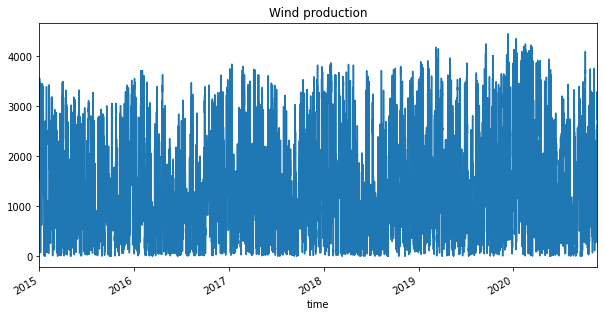

In [310]:
plt.figure(figsize=(10,5))
production_final["wind_prod"].plot(title="Wind production");

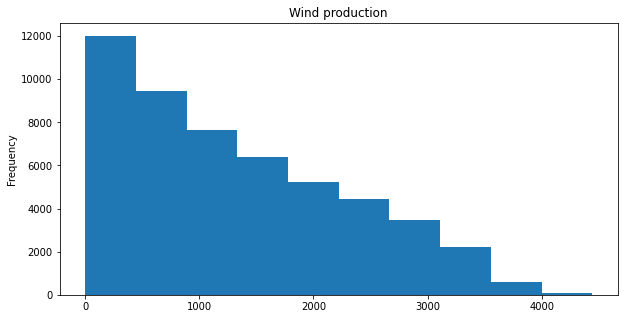

In [311]:
plt.figure(figsize=(10,5))
production_final["wind_prod"].plot(title="Wind production",kind="hist");

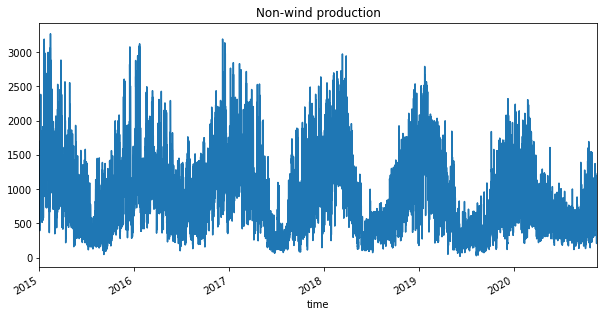

In [312]:
plt.figure(figsize=(10,5))
production_final["non_wind_prod"].plot(title="Non-wind production");

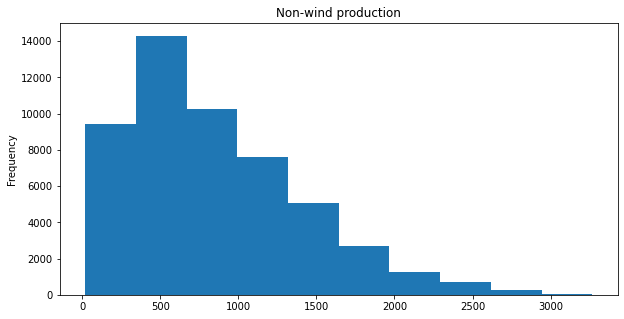

In [313]:
plt.figure(figsize=(10,5))
production_final["non_wind_prod"].plot(title="Non-wind production",kind="hist");

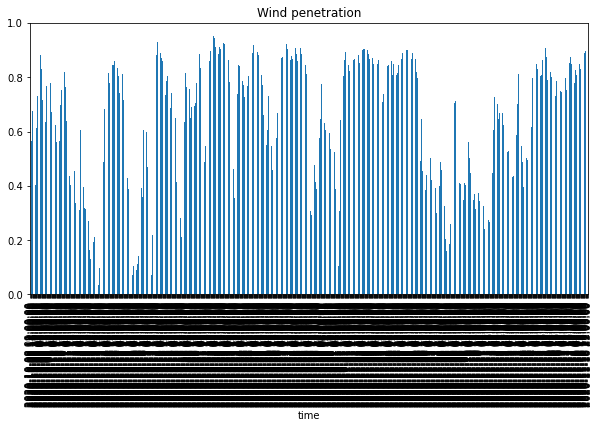

In [315]:
plt.figure(figsize=(10,5))
production_final["wind_share"][-1000:].plot(title="Wind penetration",kind="bar",

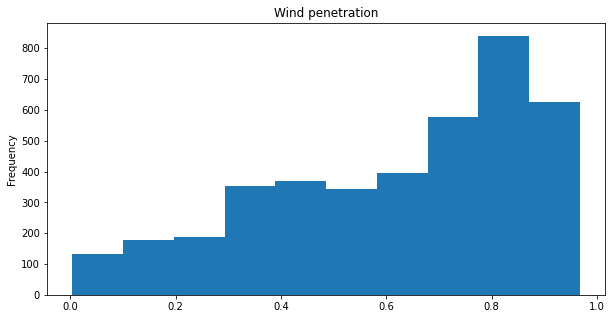

In [316]:
plt.figure(figsize=(10,5))
production_final["wind_share"][-4000:].plot(title="Wind penetration",kind="hist");